In [1]:
import pandas as pd
import sktime

In [2]:
df_anexo1 = pd.read_parquet('input_data/anexo1_daily.parquet')
df_anexo3 = pd.read_parquet('input_data/anexo3_daily.parquet')
df_mossoro = pd.read_parquet('input_data/mossoro_daily.parquet')
df_parnamirim = pd.read_parquet('input_data/parnamirim_daily.parquet')

In [3]:
df_anexo1.columns

Index(['COMUM', 'PRIORIDADES'], dtype='object')

In [4]:
df_anexo1['RATIO'] = df_anexo1['PRIORIDADES'] / (df_anexo1['PRIORIDADES'] + df_anexo1['COMUM'])
df_anexo3['RATIO'] = df_anexo3['PRIORIDADES'] / (df_anexo3['PRIORIDADES'] + df_anexo3['COMUM'])
df_mossoro['RATIO'] = df_mossoro['PRIORIDADES'] / (df_mossoro['PRIORIDADES'] + df_mossoro['COMUM'])
df_parnamirim['RATIO'] = df_parnamirim['PRIORIDADES'] / (df_parnamirim['PRIORIDADES'] + df_parnamirim['COMUM'])

df_anexo1['RATIO'] = df_anexo1['RATIO'].fillna(0)
df_anexo3['RATIO'] = df_anexo3['RATIO'].fillna(0)
df_mossoro['RATIO'] = df_mossoro['RATIO'].fillna(0)
df_parnamirim['RATIO'] = df_parnamirim['RATIO'].fillna(0)


In [5]:
df_anexo1.columns = [c + '_anexo1' for c in df_anexo1.columns]
df_anexo3.columns = [c + '_anexo3' for c in df_anexo3.columns]
df_mossoro.columns = [c + '_mossoro' for c in df_mossoro.columns]
df_parnamirim.columns = [c + '_parnamirim' for c in df_parnamirim.columns]


In [6]:
df = pd.concat([df_anexo1, df_anexo3, df_mossoro, df_parnamirim], axis=1)

In [7]:
df = df[[c for c in df.columns if 'PRIORIDADES' in c]]
df

PRIORIDADES_anexo1  PRIORIDADES_anexo3  PRIORIDADES_mossoro  \
data                                                                      
2022-06-01                  15                   5                    0   
2022-06-02                  17                   3                    9   
2022-06-03                  17                   2                   12   
2022-06-04                   0                   0                    0   
2022-06-05                   0                   0                    0   
...                        ...                 ...                  ...   
2024-10-06                   0                   0                    0   
2024-10-07                  35                  11                   18   
2024-10-08                  55                  17                   31   
2024-10-09                  41                  12                   18   
2024-10-10                  43                  13                   22   

            PRIORIDADES_parnamirim  
data                                
2022-06-01                       5  
2022-06-02                       5  
2022-06-03                       2  
2022-06-04                       0  
2022-06-05                       0  
...                            ...  
2024-10-06                       0  
2024-10-07                       9  
2024-10-08                      25  
2024-10-09                      27  
2024-10-10                      20  

[863 rows x 4 columns]

In [8]:
df

PRIORIDADES_anexo1  PRIORIDADES_anexo3  PRIORIDADES_mossoro  \
data                                                                      
2022-06-01                  15                   5                    0   
2022-06-02                  17                   3                    9   
2022-06-03                  17                   2                   12   
2022-06-04                   0                   0                    0   
2022-06-05                   0                   0                    0   
...                        ...                 ...                  ...   
2024-10-06                   0                   0                    0   
2024-10-07                  35                  11                   18   
2024-10-08                  55                  17                   31   
2024-10-09                  41                  12                   18   
2024-10-10                  43                  13                   22   

            PRIORIDADES_parnamirim  
data                                
2022-06-01                       5  
2022-06-02                       5  
2022-06-03                       2  
2022-06-04                       0  
2022-06-05                       0  
...                            ...  
2024-10-06                       0  
2024-10-07                       9  
2024-10-08                      25  
2024-10-09                      27  
2024-10-10                      20  

[863 rows x 4 columns]

In [9]:
all_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(all_days, fill_value=0)
df

PRIORIDADES_anexo1  PRIORIDADES_anexo3  PRIORIDADES_mossoro  \
2022-06-01                  15                   5                    0   
2022-06-02                  17                   3                    9   
2022-06-03                  17                   2                   12   
2022-06-04                   0                   0                    0   
2022-06-05                   0                   0                    0   
...                        ...                 ...                  ...   
2024-10-06                   0                   0                    0   
2024-10-07                  35                  11                   18   
2024-10-08                  55                  17                   31   
2024-10-09                  41                  12                   18   
2024-10-10                  43                  13                   22   

            PRIORIDADES_parnamirim  
2022-06-01                       5  
2022-06-02                       5  
2022-06-03                       2  
2022-06-04                       0  
2022-06-05                       0  
...                            ...  
2024-10-06                       0  
2024-10-07                       9  
2024-10-08                      25  
2024-10-09                      27  
2024-10-10                      20  

[863 rows x 4 columns]

In [10]:
import plotly.graph_objs as go

fig = go.Figure()

for col in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[col], mode='lines', name=col))

fig.update_layout(title='All Columns in One Graph', xaxis_title='Index', yaxis_title='Values')

fig.show()

In [23]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming df is already defined
df_weekly = df.resample('W').sum()

fig = make_subplots()

for col in df_weekly.columns:
    fig.add_trace(go.Scatter(x=df_weekly.index, y=df_weekly[col], mode='lines', name=col))

fig.update_layout(title='Weekly Mean ', xaxis_title='Date', yaxis_title='Sum')

fig.show()

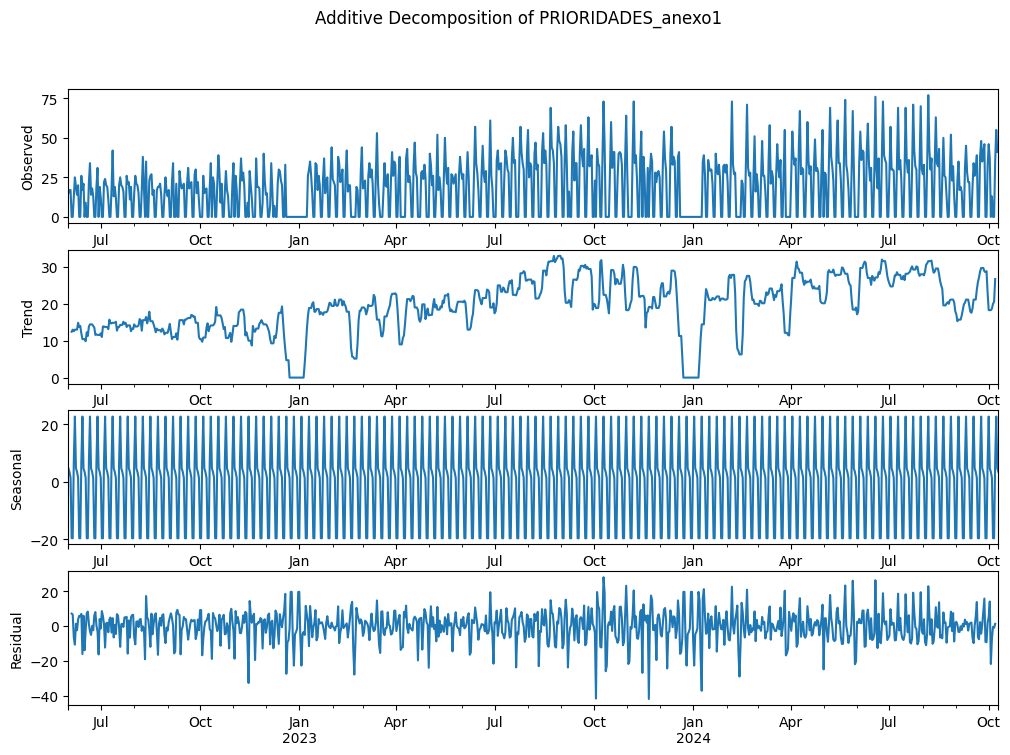

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def plot_decomposition(result, title):
    # Create a figure with 4 subplots
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
    
    # Plot observed data
    result.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')
    
    # Plot trend component
    result.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')
    
    # Plot seasonal component
    result.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    
    # Plot residual component
    result.resid.plot(ax=ax4)
    ax4.set_ylabel('Residual')
    
    # Set overall title and display the plot
    plt.suptitle(title)
    plt.show()



result = seasonal_decompose(df['PRIORIDADES_anexo1'], model='additive')
plot_decomposition(result, 'Additive Decomposition of PRIORIDADES_anexo1')


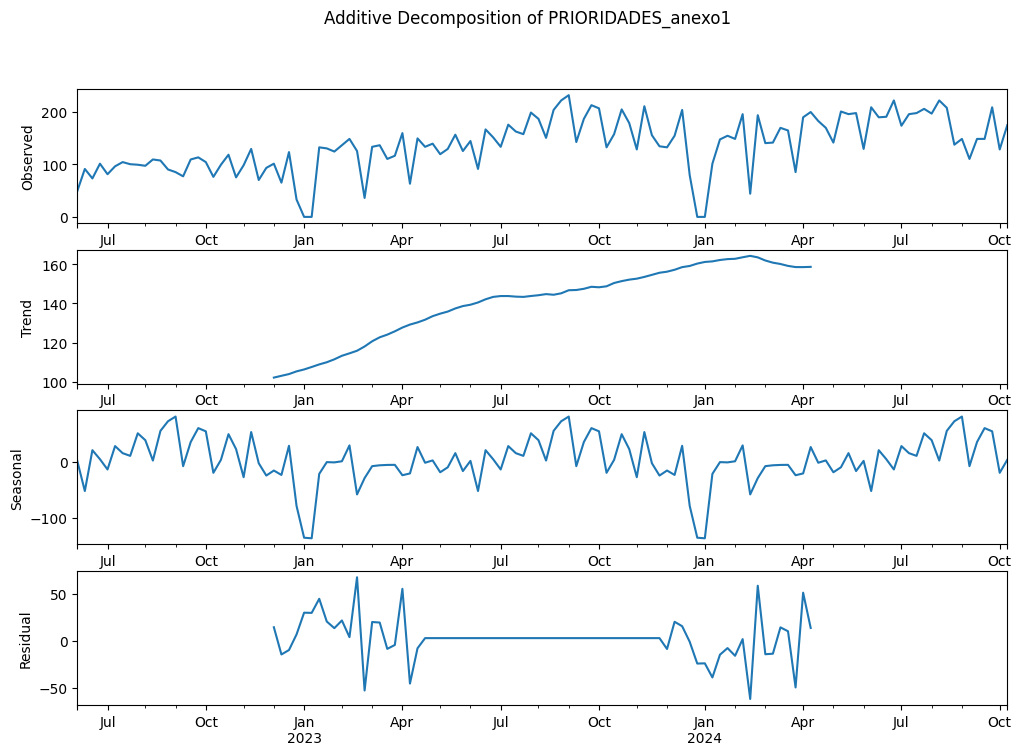

In [24]:
result = seasonal_decompose(df_weekly['PRIORIDADES_anexo1'], model='additive')
plot_decomposition(result, 'Additive Decomposition of PRIORIDADES_anexo1')

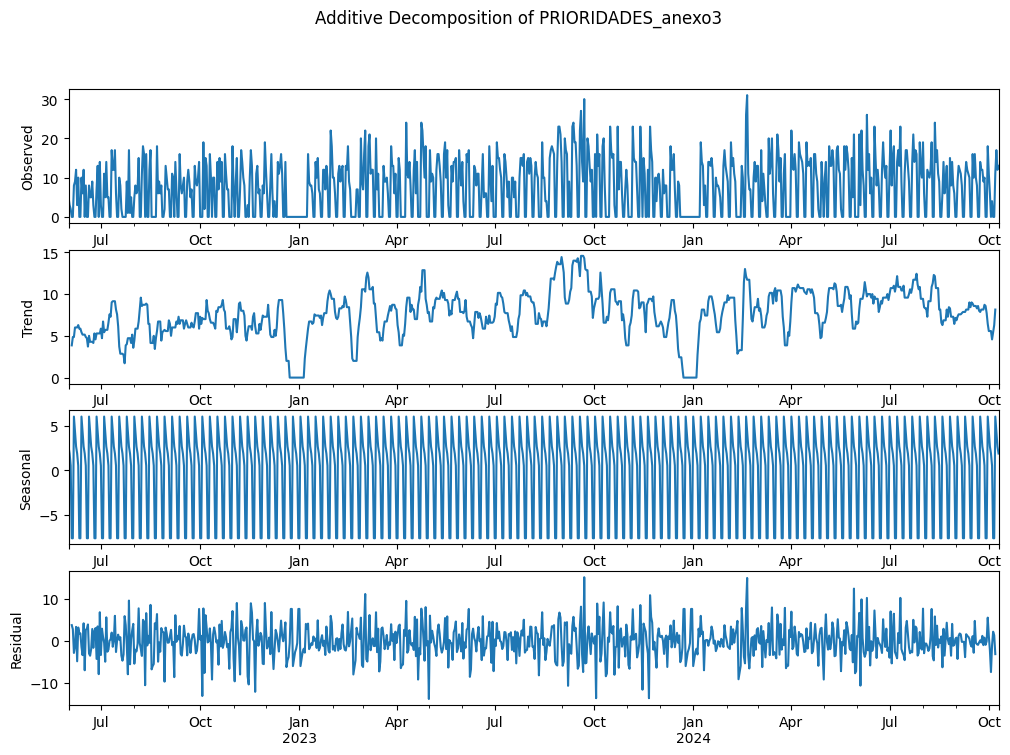

In [13]:
result = seasonal_decompose(df['PRIORIDADES_anexo3'], model='additive')
plot_decomposition(result, 'Additive Decomposition of PRIORIDADES_anexo3')

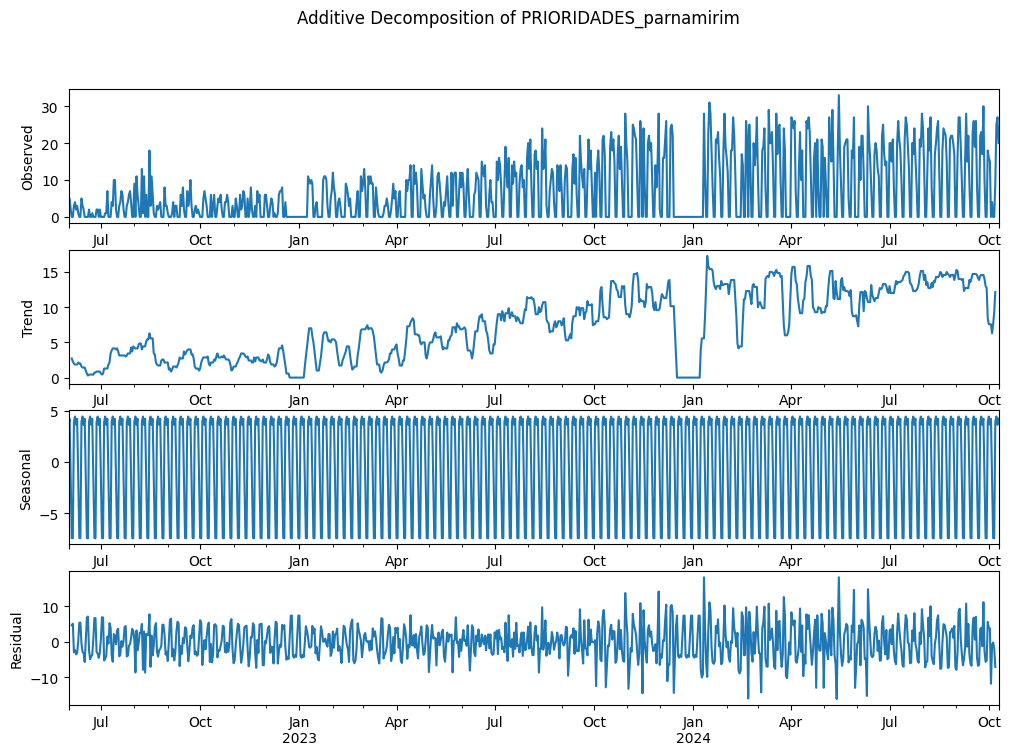

In [14]:
result = seasonal_decompose(df['PRIORIDADES_parnamirim'], model='additive')
plot_decomposition(result, 'Additive Decomposition of PRIORIDADES_parnamirim')

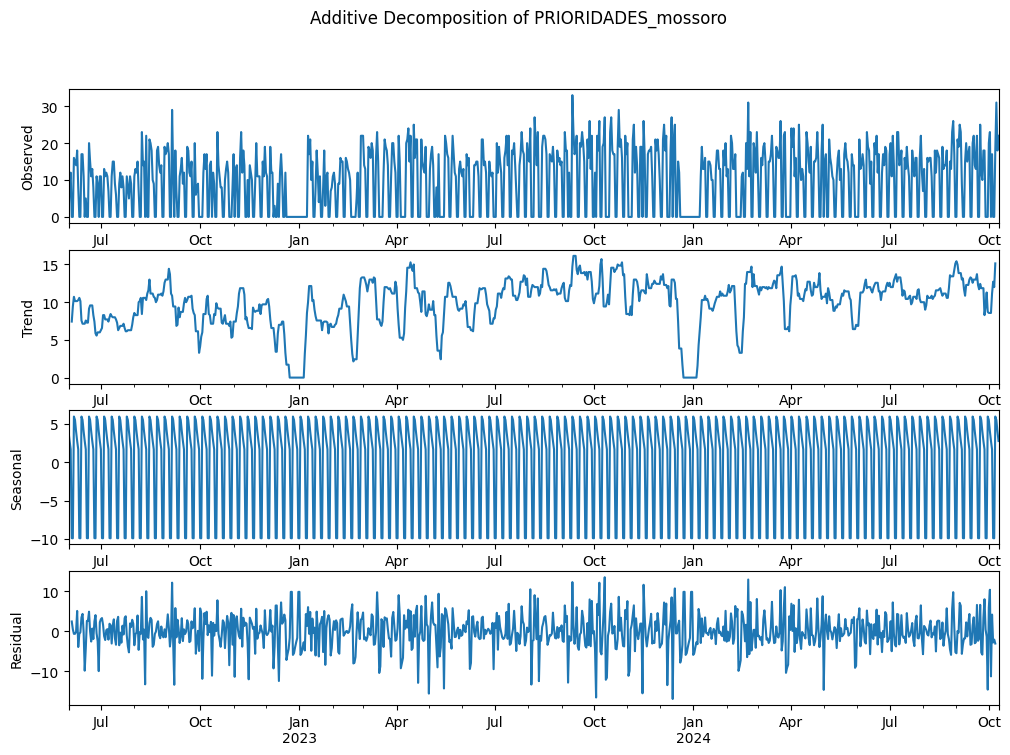

In [15]:
result = seasonal_decompose(df['PRIORIDADES_mossoro'], model='additive')
plot_decomposition(result, 'Additive Decomposition of PRIORIDADES_mossoro')

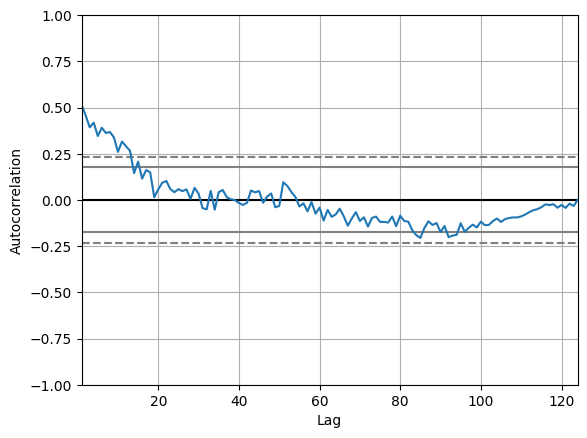

In [16]:
pd.plotting.autocorrelation_plot(df_weekly['PRIORIDADES_anexo1'])
plt.show()

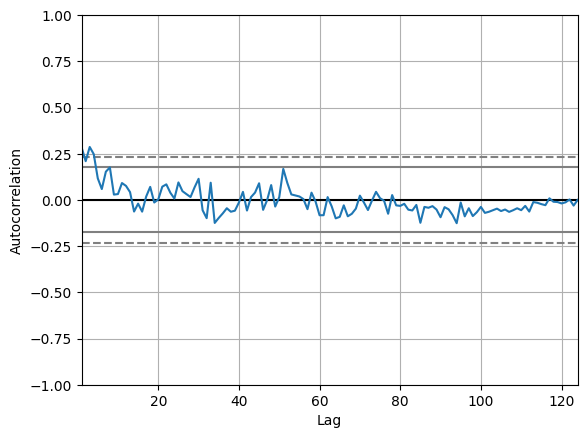

In [17]:
pd.plotting.autocorrelation_plot(df_weekly['PRIORIDADES_anexo3'])
plt.show()

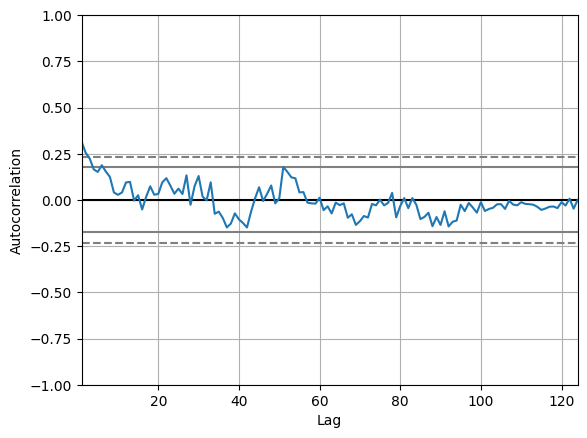

In [18]:
pd.plotting.autocorrelation_plot(df_weekly['PRIORIDADES_mossoro'])
plt.show()

In [19]:
# Import data splitting utilities from sktime
from sktime.split import ExpandingWindowSplitter, SlidingWindowSplitter

In [20]:
# Import scikit-learn utilities for machine learning tasks
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification  # For generating synthetic classification datasets
from sklearn.ensemble import RandomForestRegressor  # Random forest regressor for regression tasks
from sklearn.metrics import (mean_absolute_error, r2_score, root_mean_squared_error)  # Evaluation metrics
from sklearn.model_selection import KFold, TimeSeriesSplit, train_test_split  # Cross-validation and data splitting
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor

# Import various forecasting models from sktime
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.bats import BATS
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.forecasting.structural import UnobservedComponents
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.theta import ThetaForecaster

# Import performance metrics for forecasting from sktime
from sktime.performance_metrics.forecasting import MeanSquaredError

import numpy as np

/home/jacob/.cache/pypoetry/virtualenvs/serie-temporal-dpe-rn-kvFXfOQt-py3.12/lib/python3.12/site-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.


/home/jacob/.cache/pypoetry/virtualenvs/serie-temporal-dpe-rn-kvFXfOQt-py3.12/lib/python3.12/site-packages/gluonts/json.py:102: UserWarning:

Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.



(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='PRIORIDADES_anexo1'>)

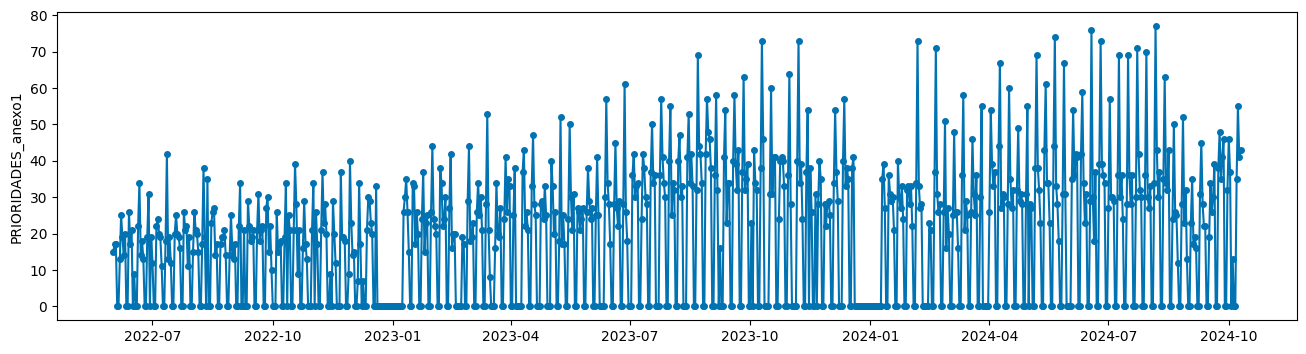

In [21]:
from sktime.utils.plotting import plot_series

plot_series(df['PRIORIDADES_anexo1'])

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='PRIORIDADES_anexo1'>)

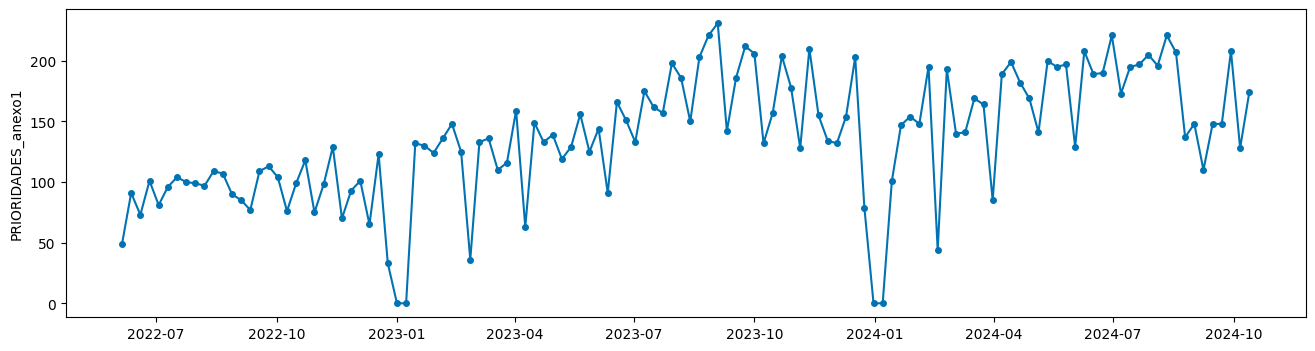

In [22]:
# Assuming df is already defined
df_weekly = df.resample('W').sum()

plot_series(df_weekly['PRIORIDADES_anexo1'])

In [36]:
import warnings


def walk_forward_validation(
    time_series: pd.Series, 
    forecasting_model, 
    splitter_type: str = "expanding", 
    initial_window_size: int = 365, 
    window_step_size: int = 7, 
    forecast_horizon: int = 7
) -> dict:
    """
    Perform walk-forward validation on a time series dataset using the specified forecasting model.
    """
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")

        # Choose the appropriate window splitter based on the splitter_type
        if splitter_type == "expanding":
            # ExpandingWindowSplitter: initial window grows over time
            splitter = ExpandingWindowSplitter(
                initial_window=initial_window_size, 
                step_length=window_step_size, 
                fh=np.arange(1, forecast_horizon + 1)
            )
        elif splitter_type == "sliding":
            # SlidingWindowSplitter: fixed-size window that slides over time
            splitter = SlidingWindowSplitter(
                window_length=initial_window_size, 
                step_length=window_step_size, 
                fh=np.arange(1, forecast_horizon + 1)
            )
        else:
            raise ValueError("splitter_type must be either 'expanding' or 'sliding'")

        # Evaluate the forecasting model using the chosen splitter
        cross_validation_results = evaluate(
            forecaster=forecasting_model,
            y=time_series,
            cv=splitter,
            strategy="refit",  # Refit the model on each iteration
            scoring=MeanSquaredError(square_root=True),  # Use RMSE as the scoring metric
            return_data=True  # Return the predicted and actual values
        )
        
        return cross_validation_results


def plot_walk_forward_validation_results(
    time_series: pd.Series, 
    cross_validation_results: dict, 
    target_column: str,
    name_model: str
) -> None:
    """
    Plot the results of walk-forward validation.
    """
    # Clean and prepare the cross-validation results
    cross_validation_results.dropna(inplace=True)
    if len(cross_validation_results) == 0:
        print("No predictions were made. This may be due to the forecast horizon being too large or the initial window size being too small.")
        return

    # Extract predictions and true values
    predictions = [item.values[0] for item in cross_validation_results["y_pred"]]
    true_values = [item.values[0] for item in cross_validation_results["y_test"]]

    # Get the indices for predictions and true values
    idx_pred = [i.index[0] for i in cross_validation_results["y_pred"]]
    idx_true = [i.index[0] for i in cross_validation_results["y_test"]]

    # Create pandas Series for predictions and true values
    predictions = pd.Series(predictions, index=idx_pred)
    true_values = pd.Series(true_values, index=idx_true)

    # Create a Plotly figure
    fig = go.Figure()

    # Plot true values and predictions
    fig.add_trace(go.Scatter(x=true_values.index, y=true_values, mode="lines", name="True"))
    fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode="lines", name=name_model))

    # Add performance metrics to the plot
    fig.add_annotation(
        x=0.5, y=0.9, xref="paper", yref="paper",
        text=f"RMSE: {root_mean_squared_error(true_values, predictions):.2f}",
        showarrow=False,
    )
    fig.add_annotation(
        x=0.5, y=0.85, xref="paper", yref="paper",
        text=f"R²: {r2_score(true_values, predictions):.3f}",
        showarrow=False,
    )
    fig.add_annotation(
        x=0.5, y=0.8, xref="paper", yref="paper",
        text=f"MAE: {mean_absolute_error(true_values, predictions):.2f}",
        showarrow=False,
    )

    # Set the plot title
    fig.update_layout(title=f"True vs. {name_model} - {target_column}")

    # Display the plot
    fig.show()

In [34]:
model = Prophet(
            seasonality_mode="additive",
            add_country_holidays={"country_name": "Brazil"},
            yearly_seasonality='auto',
            weekly_seasonality='auto',
            daily_seasonality='auto',
            verbose=0
        )



In [38]:
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [39]:
# Perform walk-forward validation for the current model
cross_validation_results_anexo1 = walk_forward_validation(
    time_series=df["PRIORIDADES_anexo1"],  # Use the time series data
    forecasting_model=model,
    splitter_type="expanding",  # Use expanding window strategy
    initial_window_size=365,  # Start with 1 year of data
    window_step_size=1,  # Increase window size by 7 days
    forecast_horizon=15  # Forecast 15 days ahead
)


In [40]:
plot_walk_forward_validation_results(
    time_series=df_weekly["PRIORIDADES_anexo1"],
    cross_validation_results=cross_validation_results_anexo1,  # Pass in the results for the current model
    target_column="PRIORIDADES_anexo1",  # Specify the target column name
    name_model='Prophet'  # Pass the model name for labeling in the plot
)